# KNeighborsRegressor,KNeighborsClassifier,LinearRegression apply on same data set and compare

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# one_hot encoding
df2= pd.get_dummies(df, columns=['Gender'],drop_first=True)
df2

,Height,Weight,Gender_Male
0,73.847017,241.893563,True
1,68.781904,162.310473,True
2,74.110105,212.740856,True
3,71.730978,220.042470,True
4,69.881796,206.349801,True
...,...,...,...
8550,60.483946,110.565497,False
8551,63.423372,129.921671,False
8552,65.584057,155.942671,False
8553,67.429971,151.678405,False


In [5]:

x=df2.drop('Gender_Male',axis=True)
x

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [6]:
y=df2['Gender_Male']
y

0        True
1        True
2        True
3        True
4        True
        ...  
8550    False
8551    False
8552    False
8553    False
8554    False
Name: Gender_Male, Length: 8555, dtype: bool

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [8]:
x_train
y_train

4693     True
280      True
6713    False
6104    False
5677    False
        ...  
6695    False
3435     True
2077     True
4067     True
7186    False
Name: Gender_Male, Length: 5988, dtype: bool

In [9]:
# Apply KKN(regression)

In [10]:
model1=KNeighborsRegressor(n_neighbors=3)

In [11]:
model1.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [12]:
model1.score(x_test,y_test)

0.6211681619108983

In [13]:
kr_y=model1.predict(x_train)
kr_y_test=model1.predict(x_test)
#mean_squared_error(y_test, y_pred)
kr_mse= mean_squared_error(y_train,kr_y)
kr_mse
kr_r2=r2_score(y_train,kr_y)
kr_r2

0.8393450969444347

In [14]:
#Apply KNN calssification regression


In [15]:
model2= KNeighborsClassifier(n_neighbors=3)

In [16]:
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
model2.score(x_test,y_test)

0.8932606155044799

In [18]:
kc_y=model2.predict(x_train)

In [19]:
kc_mse= mean_squared_error(y_train,kc_y.astype(int))
kc_mse
kc_r2=r2_score(y_train,kc_y.astype(int))
kc_r2
kc_mse

0.05778223112892451

In [20]:
# here we see taht the KNeighborsClassifier is the best compere to KNeighors Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model3=LinearRegression()

In [23]:
model3.fit(x_train,y_train)

LinearRegression()

In [24]:
model3.score(x_test,y_test)

0.6365527998287928

In [36]:
lr_y=model3.predict(x_train)

In [38]:
lr_mse= mean_squared_error(y_train,lr_y.astype(int))
lr_mse
lr_r2=r2_score(y_train,lr_y.astype(int))
lr_r2
lr_mse

0.4288577154308617

In [27]:
# Now we see the graph of the Linear regression
from sklearn.metrics import confusion_matrix
y_test
kr_y_test

array([1.        , 0.        , 0.        , ..., 1.        , 1.        ,
       0.33333333])

In [28]:
cmkr=confusion_matrix(y_test,kr_y_test.astype(bool))

In [29]:
cmkr

array([[ 737,  312],
       [  56, 1462]], dtype=int64)

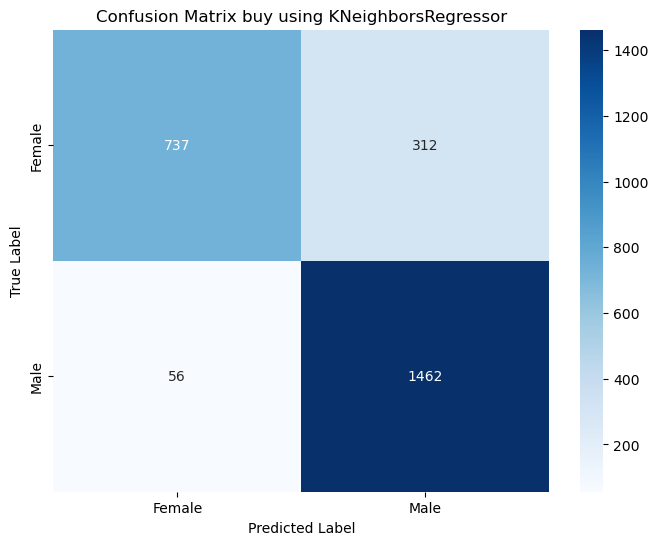

In [30]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cmkr, annot=True, fmt="d", cmap="Blues", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix buy using KNeighborsRegressor')
plt.show()

In [31]:
kc_y_test=model2.predict(x_test)

In [32]:
cmkc=confusion_matrix(y_test,kc_y_test.astype(bool))

In [33]:
cmkc

array([[ 895,  154],
       [ 120, 1398]], dtype=int64)

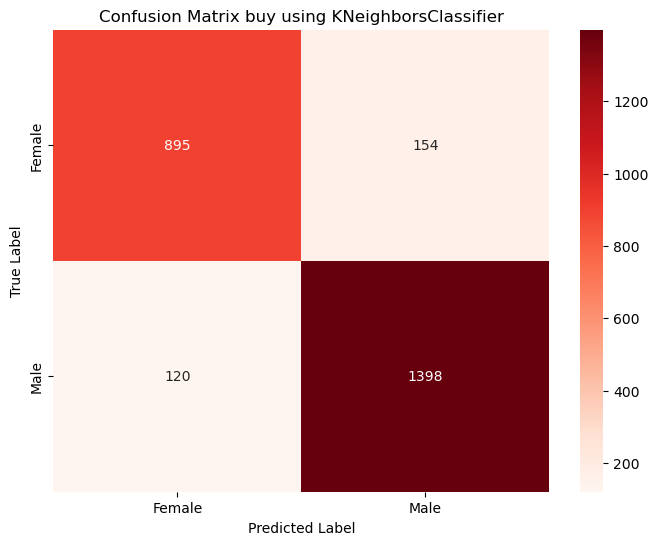

In [34]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cmkc, annot=True, fmt="d", cmap="Reds", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix buy using KNeighborsClassifier')
plt.show()

In [35]:
lr_y_test=lr.predict(x_test)

NameError: name 'lr' is not defined

In [39]:
lr_y_test=model3.predict(x_test)

In [40]:
cmlr=confusion_matrix(y_test,lr_y_test.astype(bool))

In [41]:
cmlr

array([[   0, 1049],
       [   0, 1518]], dtype=int64)

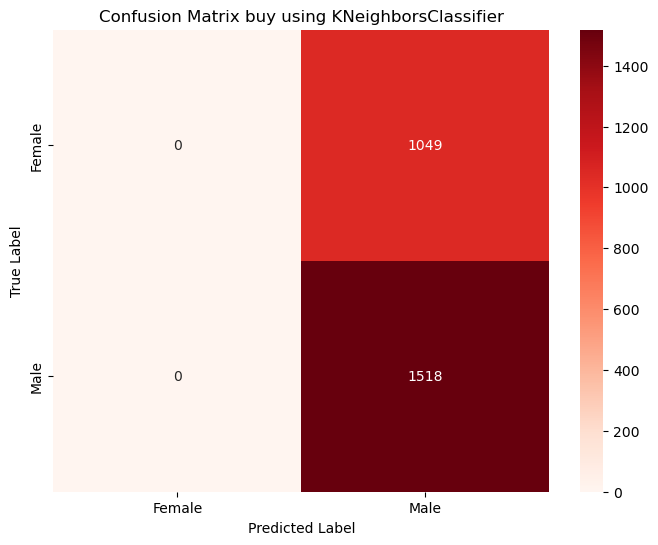

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmlr, annot=True, fmt="d", cmap="Reds", xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix buy using KNeighborsClassifier')
plt.show()